# Pandas II - Data Cleaning

_October 29, 2020_

Agenda today:
- Introduction to lambda function
- Introduction to data cleaning in pandas
- Combining DataFrames
- Optional Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Part I. Lambda function
lambda functions are known as anonymous functions in Python. It allows you to write one-line functions that are used together with `map()`, `filter()`.

Syntax of lambda function: `lambda arguments:expressions`. 

In [4]:
# lambda function with one argument
f = lambda x:x+10
# add 10 to any number
f(10)

20

In [5]:
(lambda x,y,z: x+y+z)(1,2,3)

6

In [ ]:
# lambda function with multiple arguments


In [7]:
# chain it with conditionals
f = lambda x: x+10 if x>10 else x

In [10]:
f(11)

21

In [13]:
#use it with map and filter

#map(function, collection)
list(map(lambda x: x+10, [1,2,3]))

[11, 12, 13]

In [19]:
#filter(function, collection)
list(filter(lambda x: x+20,[1,2,3]))

[1, 2, 3]

In [23]:
fib = [0,1,1,2,3,5,8,13,21,34,55]
list(filter(lambda x: x > 2, fib))

[3, 5, 8, 13, 21, 34, 55]

In [25]:
from functools import reduce

In [26]:
reduce(lambda x,y: x+y, fib)

143

In [ ]:
# exercise: turn the below function into a lambda function
def count_zeros(li):
    """
    return a count of how many zeros are in a list
    """
    count = sum(x == 0 for x in li)
    return count

In [31]:
list(filter(lambda x: x == 0, fib))

[0]

## Part II. Data Cleaning in Pandas
You might wonder what the usage of lambda functions are - they are incredibly useful when applied to data cleaning in Pandas. You can apply it to columns or the entire dataframe to get results you need. For example, you might want to convert a column with $USD to Euros, or temperature expressed in Celsius to Fehrenheit. You will learn three new functions:

- `Apply()` - on both series and dataframe

- `Applymap()` - only on dataframes

- `Map()` - only on series

In [32]:
# import the dataframe 
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
# examine the first few rows of it 
df['years_old'] = 120 - df['model year']

In [38]:
df# check the datatypes of the df
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,years_old
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,43.989950
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,38.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,41.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,44.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,47.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,50.000000


In [ ]:
# check whether you have missing values


In [ ]:
# creating new columns - broadcasting 


In [ ]:
# check the dataframe


In [ ]:
# time to use lambda and apply! with apply, applymap, and map, you never need to "iterate through the rows"

# create a function that takes in the weight as lbs, and return weight in tons 

# 1 lb = 0.0005


In [ ]:
#broadcasting



In [ ]:
# exercise - create a new column called "years old", which determines how old a car is 


## Part III. Combining DataFrames in Pandas
There are two methods in Pandas that allow us to combine our DataFrames:

    - df.merge() - allow us to match dataframes on either indices or columns
    - df.concat() - allow us to concatenate two dataframes vertically or horizontally 


In [39]:
# create some toy dataframes 
small_grades = pd.DataFrame({"students":["Sandra","Billy","Alan"],
                          "projects":[1,2,1],
                          "grades":np.random.randint(80,100,3)})
small_quiz = pd.DataFrame({"students":["Alan","Steven","Davida"],
                            "quiz_score":np.random.randint(0,10,3)})

In [40]:
print(small_grades)
print(small_quiz)

  students  projects  grades
0   Sandra         1      96
1    Billy         2      84
2     Alan         1      95
  students  quiz_score
0     Alan           5
1   Steven           2
2   Davida           8


In [45]:
### df.concat 
combined = pd.concat([small_grades, small_quiz], axis = 1)

In [46]:
combined

,students,projects,grades,students,quiz_score
0,Sandra,1,96,Alan,5
1,Billy,2,84,Steven,2
2,Alan,1,95,Davida,8


In [57]:
pd.merge(small_grades,small_quiz,how='inner',on='students')

,students,projects,grades,quiz_score
0,Alan,1,95,5


<img src = 'sql-joins.png' width = 400>

Based on the diagram above, what are the differences of different types of merge?

In [ ]:
### df.merge

# inner merge

#small_grades.merge(small_quiz, on = 'students')

In [ ]:
# outer merge

#small_grades.merge(small_quiz, how = 'outer', on = 'students')

In [ ]:
# right merge


### Data Cleaning - level up with the adult dataset

Dataset documentation:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url,header = None)

In [3]:
adults.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Check the first few rows 


In [5]:
# add the columns to dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital_status','occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']

In [6]:
adults.columns = columns

In [ ]:
# check the info of dataset


In [ ]:
# check missing values


In [ ]:
# perform some queries - find the total num female & bachelors


In [8]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# seems like we have data anolmaly, find out what that is and fix it 
# hint - tons of entries contain white space, remove it!

In [12]:
adults.applymap(lambda x: x.split() if type(x) == str else x)

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,[State-gov],77516,[Bachelors],13,[Never-married],[Adm-clerical],[Not-in-family],[White],[Male],2174,0,40,[United-States],[<=50K]
1,50,[Self-emp-not-inc],83311,[Bachelors],13,[Married-civ-spouse],[Exec-managerial],[Husband],[White],[Male],0,0,13,[United-States],[<=50K]
2,38,[Private],215646,[HS-grad],9,[Divorced],[Handlers-cleaners],[Not-in-family],[White],[Male],0,0,40,[United-States],[<=50K]
3,53,[Private],234721,[11th],7,[Married-civ-spouse],[Handlers-cleaners],[Husband],[Black],[Male],0,0,40,[United-States],[<=50K]
4,28,[Private],338409,[Bachelors],13,[Married-civ-spouse],[Prof-specialty],[Wife],[Black],[Female],0,0,40,[Cuba],[<=50K]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,[Private],257302,[Assoc-acdm],12,[Married-civ-spouse],[Tech-support],[Wife],[White],[Female],0,0,38,[United-States],[<=50K]
32557,40,[Private],154374,[HS-grad],9,[Married-civ-spouse],[Machine-op-inspct],[Husband],[White],[Male],0,0,40,[United-States],[>50K]
32558,58,[Private],151910,[HS-grad],9,[Widowed],[Adm-clerical],[Unmarried],[White],[Female],0,0,40,[United-States],[<=50K]
32559,22,[Private],201490,[HS-grad],9,[Never-married],[Adm-clerical],[Own-child],[White],[Male],0,0,20,[United-States],[<=50K]


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
y = adults['occupation'].value_counts().values
x = adults['occupation'].value_counts().index

<BarContainer object of 15 artists>

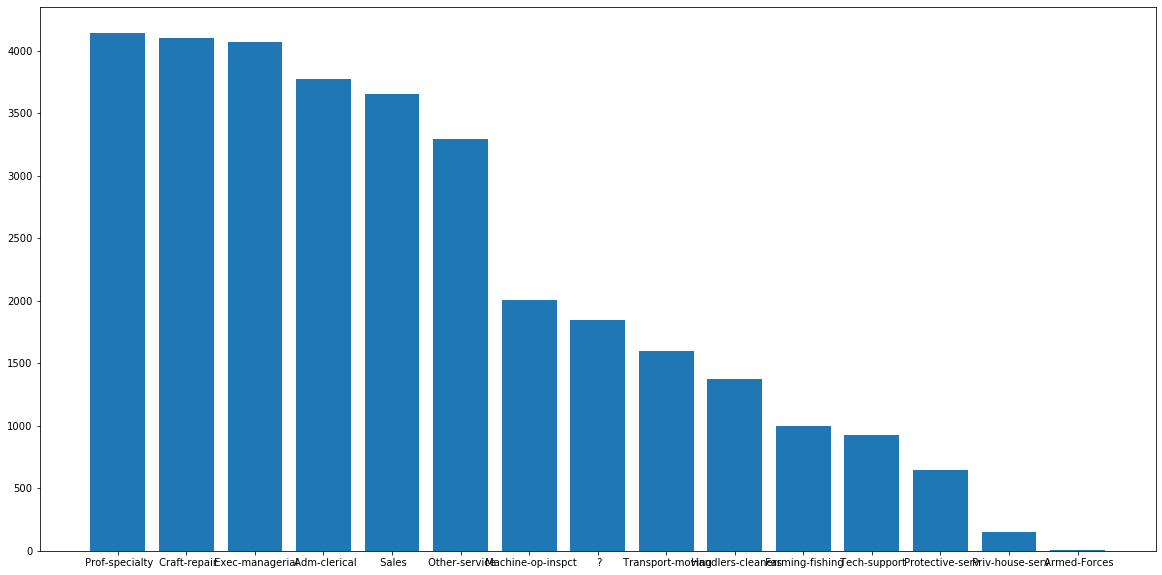

In [20]:
# subsetting multiple cols
plt.figure(figsize=(20,10))
plt.bar(x,y)

In [ ]:
# create a column called income_binary, 1 if >50k and 0 otherwise

In [ ]:
# get some descriptive statistics of the income distribution 